# Advanced MLP
- Advanced techniques for training neural networks
  - Weight Initialization
  - Nonlinearity (Activation function)
  - Optimizers
  - Batch Normalization
  - Dropout (Regularization)
  - Model Ensemble

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import Dropout
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from keras.layers import BatchNormalization

Using TensorFlow backend.


## Load Dataset
- MNIST dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


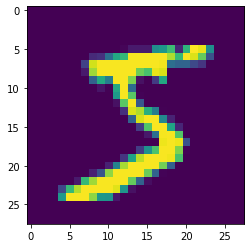

Label:  5


In [4]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])

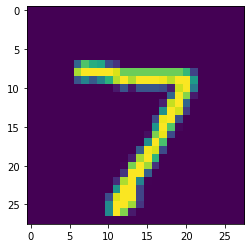

Label:  7


In [5]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test[0]) #7자가 꼭 가운데에 있지는 않다., 만약, 7이 정중앙에 있다면, 잘 인식 못한다.

In [6]:
# reshaping X data: (n, 28, 28) => (n, 784) 2차원으로 된것들을 1차원으로 바꾸어준다.
#언패킹식표현
X_train = X_train.reshape((X_train.shape[0], -1)) #shape 0은 개수 , shape[1]은 행의 개수, shape[2]은 열의 개수, -1은 나머지영역을 한개의
#차원으로 묶어서 처리, 784로 써도 되고, -1로 쓰면 알아서 처리해준다.
X_test = X_test.reshape((X_test.shape[0], -1))

In [7]:
print(X_test.shape[0])

10000


In [8]:
#감이 잘 오도록 다음과 같은 예제를 제시
a = np.array([[1, 2], [3, 4], [5, 6]])
print(a)
a = a.reshape(3, -1)
print(a)

[[1 2]
 [3 4]
 [5 6]]
[[1 2]
 [3 4]
 [5 6]]


In [9]:
# use only 33% of training data to expedite the training process, train_size 또는 test_size 둘중 하나이상 써주면 된다.
X_train, _ , y_train, _ = train_test_split(X_train, y_train, test_size = 0.67, random_state = 7)

In [10]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#원핫 인코딩, 본인이 해당하는 속성만 1, 나머지는 0
#0 -> 1 0 0
#1 -> 0 1 0
#2 -> 0 0 1
print(X_train.shape)
print(y_test.shape)

(19800, 784)
(10000, 10)


In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19800, 784) (10000, 784) (19800, 10) (10000, 10)


# Basic MLP model

In [12]:
model = Sequential()

In [13]:
model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))

model.add(Dense(50))
model.add(Activation('sigmoid'))

model.add(Dense(50))
model.add(Activation('sigmoid'))

model.add(Dense(50))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('softmax'))
#binary때는 sigmoid, softmax는 binary를 여러개 합친것, 이것도 학률값이 나온다. sigmoid 써도 된다. 둘다 출력값은 10개, 그러나,
#확률은 다 더하면, 1이 되어야 하는데, binary는 그렇지 않다. 이 기능이 부여된것이 softmax, 정규화 기능을 해주는것이다.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [14]:
sgd = optimizers.SGD(lr = 0.001) #Adam으로 하면, 금방 올라감, nmodel.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
#70%만 가지고 학습을 하겠다.나머지는, valudation set을 구성하겠다.
history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.3, epochs = 200, verbose = 0)

In [16]:
print(history.history)

{'val_loss': [2.527972113644635, 2.486748679318412, 2.453981403871016, 2.4278823875016236, 2.4064413032146414, 2.3891182417821404, 2.3746611415336427, 2.3628457197837958, 2.352977645437324, 2.344637070440684, 2.3378887170091622, 2.3320629346250286, 2.327166612220533, 2.3230094240169334, 2.3195866201060387, 2.316655559411354, 2.3142274500143647, 2.312132969287911, 2.3103943137608796, 2.3088920604500305, 2.3075761144811455, 2.3065233696189393, 2.30564531075834, 2.304909837125528, 2.3042244880689116, 2.303650960536918, 2.303185308180273, 2.3027965991986723, 2.302457584034313, 2.3021874188574074, 2.3019694196656095, 2.301774762214635, 2.3015979823038633, 2.3014560386387988, 2.301341731299455, 2.3012415686841767, 2.301156499971846, 2.301081788419473, 2.3010198491992373, 2.300970631416398, 2.3009247497276024, 2.300890953211672, 2.300862633419358, 2.30083848940403, 2.300822207903621, 2.300814894473914, 2.3007976382669777, 2.3007843744875203, 2.3007744358846236, 2.3007613190095433, 2.300750063

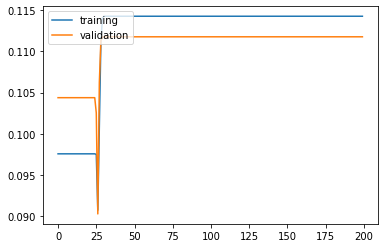

In [17]:
#training이 항상 validation보다 더 잘나온다.
#결과는 매번 다르다. 출발점이 달라진다., 수평해진 부분부터는 계산이 없는것이다.

#이 현상의 주범은 sigmoid

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy seems to improve after around 60 epochs

In [18]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 18us/step


In [19]:
print('Test accuracy: ', results[1])

Test accuracy:  0.11349999904632568


## 1. Weight Initialization



- Xavier
- Uniform distribution : sqrt( 6 / (fan_in + fan_out))
- Normal distribution  : N(0, sqrt(2. / (fan_in + fan_out)))

- HE
- Uniform distribution : limit is sqrt( 6 / fan_in)
- Normal distribution : N(0, sqrt(2 / fan_in))

In [20]:
# from now on, create a function to generate (return) models
# uniform distribution : ㅣㅣㅣㅣㅣ 균등분포
# Normal은 Gaussian 분포, 가운데가 가장 높게 한것
#fain_in, fan_out : 입력의 개수와 출력의 개수, 상수를 바꾼다고 해서, 결과가 크게 달라지지 않는다.

def mlp_model():
    model = Sequential()
    
    #초기화 방법을 어떤 방식으로 할것인가, 잘 모르면, normal 쓰면 된다.
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [21]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

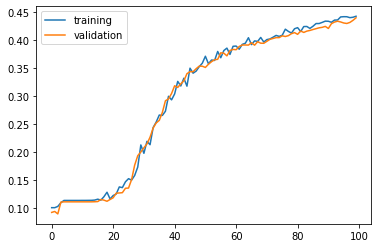

In [22]:
#발산하지 않도록, w값을 잘 잡아준것, 초기값을 적절한 값ㅇ로 세팅해주어야 한다.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy seems to improve after around 60 epochs

In [23]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 18us/step


In [24]:
print('Test accuracy: ', results[1])

Test accuracy:  0.44269999861717224


## 2. Nonlinearity (Activation function)

In [25]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [26]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

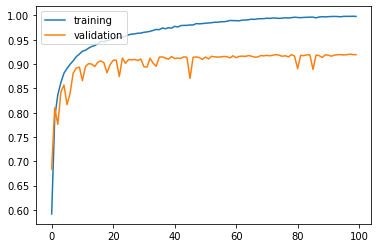

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve instantaneously, but reach a plateau after around 30 epochs

In [28]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 19us/step


In [29]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9211999773979187


## 3. Optimizers


In [30]:
#선형함수는 비선형문제를 풀 수 없다. 그래서, 비선형 함수를 쓴다.
#나쁜 sigmoid, 즉, 나쁜 출발점에서 시작해도, 90%이상의 accuracy가 나온다.
#좋은것만 섞으면 될까? 좋아지긴 한다. 그대신, 개선폭이 좁아진다.
#결론, relu 쓰고, 초기값은 가급적이면, adam을 사용해라
#절대 사용하지 말아야할것이, 기본경사하강법이다. 너무 느리다.

def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))  
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)                     #use Adam optimizer, lr : 러닝레이트, 얘를 키우면 오히려 값이 안나온다.
    #모멘텀까지 반영을 하기 때문에 잘 안나올것이다.
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [31]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

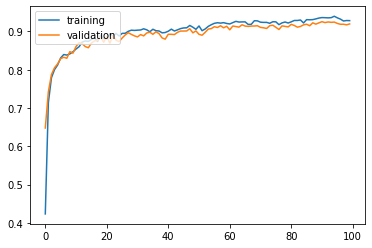

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve instantaneously, but reach plateau after around 50 epochs

In [33]:
#results는 튜플 loss와 accuracy 값을 준다.
results = model.evaluate(X_test, y_test)
print(results)

10000/10000 [==============================] - 0s 20us/step
[0.2699948358118534, 0.9175999760627747]


In [34]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9175999760627747


## 4. Batch Normalization

鍮꾩꽑�삎 蹂��솚 �쟾�뿉 異붽?

In [35]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization()) #모든 입력을 정규분포 형태로 만들어준다. 평균 0, 표준편차 1로 만들어준다.
    #성능 개선에 크게 도움이 된다.
    #+-*/ 은 선형변환
    #sigmoid 같은것은 비선형 변환
    #Batch를 꼭 여기할 필요는 없지만, Activation 전에 하는것이 좋다.
    model.add(Activation('sigmoid')) 
    
    #세줄로 나눠쓰는게 수정하기도 편하고, 문제를 일으킬 확률도 적다.
    #테스트 할때는 나중에 거꾸로 보상을 해주어야 한다. 조작을 했기 때문에, 나중에 다시 볼때는 원래대로 돌려놓는다.
    #예를들어, 700 ~ 800 값의 주식을 0 ~ 1로 표현한다. 그리고 계산 후 나중에는 700 ~ 800으로 반환한다.
    #그냥, 정규화 알고리즘은, 평균을 0으로 하고, scale을 1로 만드는거다 정도로 알자.
    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    #가장 안좋은 학습방법
    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid')) 
    
    model.add(Dense(10))
    model.add(Activation('softmax')) #가장 느린 학습방법
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [36]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

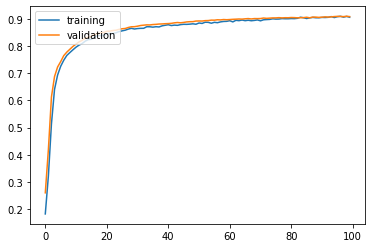

In [37]:
#데이터를 넣는 만큼 성능이 올라간다.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve consistently, but reach plateau after around 60 epochs

In [38]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 26us/step


In [39]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9111999869346619


## 5. Dropout (Regularization)

In [40]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.5))                        # Dropout layer after Activation, 해도되고 안해도 된다. 100개중에서 20%만 무작위로
    #날리겠다.
    #가중치를 0으로 만들어 주는것이 Dropout, weight를 0으로 만든다. 이유는 overfitting을 방지하기 위한것

    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.5))                        # Dropout layer after Activation
    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.5))                        # Dropout layer after Activation
    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.5))                        # Dropout layer after Activation
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [41]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

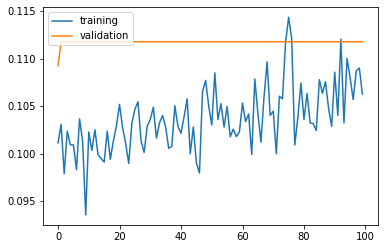

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [43]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 22us/step


In [44]:
print('Test accuracy: ', results[1])

Test accuracy:  0.11349999904632568


## 6. Model Ensemble

In [45]:
y_train = np.argmax(y_train, axis = 1)
y_test = np.argmax(y_test, axis = 1)
#onehot 인코딩된 레이블을 다시, 레이블값으로 변환

In [46]:
print(np.max([1, 2, 3, 4, 1, 8, 2.4])) #최대값
print(np.argmax([1, 2, 3, 4, 1, 8, 2.4])) #최대값이 존재하는곳의 인덱스, 해당 레이블의 위치

#to_categorical : 원핫 인코딩된 결과를 다시 레이블로 변환

label = [0, 0, 2, 1]
x = np.array([[1, 0, 0], [1, 0, 0], [0, 0, 1], [0, 1, 0]])

print(np. argmax(x, axis = 1))
x = np.array([0.21, 0.4, 0.9])
np.argmax(x)

print(np.argmax(x))

#A = [[1, 3, 4], [1, 1, 1], [2, 2, 3]]
#sum (A), 전체 sum, 로우 sum, column sum 이걸 조정해주는게 axis이다.

8.0
5
[0 0 2 1]
2


In [47]:
print(y_train)
print(y_test)

[6 9 2 ... 5 5 3]
[7 2 1 ... 4 5 6]


In [48]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))   
    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [49]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1) #딱히 batchsize 지정하지 않으면, 한번할때, 한꺼번에 다한다.
model2 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 1)

In [50]:
ensemble_clf = VotingClassifier(estimators = [
    ('model1', model1), 
    ('model2', model2), 
    ('model3', model3)], voting = 'soft')

#하드방식 : 모두 똑같이 반영, 소프트방식 : 가중치를 정해서 반영
#valiadation data값이 있어야, 소프트방식 사용가능

In [51]:
ensemble_clf.fit(X_train, y_train) #실제 학습은 오래걸린다. 모든 학습을 4번을 해야한다. 

Epoch 1/100
19800/19800 [==============================] - 1s 41us/step - loss: 2.4178 - accuracy: 0.1017
Epoch 2/100
19800/19800 [==============================] - 1s 37us/step - loss: 2.3117 - accuracy: 0.1147
Epoch 3/100
19800/19800 [==============================] - 1s 36us/step - loss: 2.3008 - accuracy: 0.1135
Epoch 4/100
19800/19800 [==============================] - 1s 36us/step - loss: 2.2994 - accuracy: 0.1135
Epoch 5/100
19800/19800 [==============================] - 1s 36us/step - loss: 2.2990 - accuracy: 0.1135
Epoch 6/100
19800/19800 [==============================] - 1s 36us/step - loss: 2.2987 - accuracy: 0.1135
Epoch 7/100
19800/19800 [==============================] - 1s 37us/step - loss: 2.2984 - accuracy: 0.1135
Epoch 8/100
19800/19800 [==============================] - 1s 36us/step - loss: 2.2981 - accuracy: 0.1135
Epoch 9/100
19800/19800 [==============================] - 1s 36us/step - loss: 2.2979 - accuracy: 0.1135
Epoch 10/100
19800/19800 [====================

19800/19800 [==============================] - 1s 35us/step - loss: 2.2724 - accuracy: 0.1135
Epoch 78/100
19800/19800 [==============================] - 1s 35us/step - loss: 2.2718 - accuracy: 0.1137
Epoch 79/100
19800/19800 [==============================] - 1s 35us/step - loss: 2.2710 - accuracy: 0.1137
Epoch 80/100
19800/19800 [==============================] - 1s 35us/step - loss: 2.2703 - accuracy: 0.1247
Epoch 81/100
19800/19800 [==============================] - 1s 35us/step - loss: 2.2695 - accuracy: 0.1137
Epoch 82/100
19800/19800 [==============================] - 1s 35us/step - loss: 2.2687 - accuracy: 0.1149
Epoch 83/100
19800/19800 [==============================] - 1s 35us/step - loss: 2.2678 - accuracy: 0.1232
Epoch 84/100
19800/19800 [==============================] - 1s 34us/step - loss: 2.2670 - accuracy: 0.1301
Epoch 85/100
19800/19800 [==============================] - 1s 36us/step - loss: 2.2661 - accuracy: 0.1209
Epoch 86/100
19800/19800 [========================

19800/19800 [==============================] - 1s 37us/step - loss: 2.2822 - accuracy: 0.1135
Epoch 54/100
19800/19800 [==============================] - 1s 37us/step - loss: 2.2816 - accuracy: 0.1135
Epoch 55/100
19800/19800 [==============================] - 1s 37us/step - loss: 2.2811 - accuracy: 0.1135
Epoch 56/100
19800/19800 [==============================] - 1s 38us/step - loss: 2.2805 - accuracy: 0.1142
Epoch 57/100
19800/19800 [==============================] - 1s 37us/step - loss: 2.2799 - accuracy: 0.1148
Epoch 58/100
19800/19800 [==============================] - 1s 38us/step - loss: 2.2793 - accuracy: 0.1151
Epoch 59/100
19800/19800 [==============================] - 1s 37us/step - loss: 2.2787 - accuracy: 0.1150
Epoch 60/100
19800/19800 [==============================] - 1s 37us/step - loss: 2.2780 - accuracy: 0.1154
Epoch 61/100
19800/19800 [==============================] - 1s 37us/step - loss: 2.2773 - accuracy: 0.1243
Epoch 62/100
19800/19800 [========================

19800/19800 [==============================] - 1s 37us/step - loss: 2.2928 - accuracy: 0.1135
Epoch 30/100
19800/19800 [==============================] - 1s 38us/step - loss: 2.2925 - accuracy: 0.1135
Epoch 31/100
19800/19800 [==============================] - 1s 37us/step - loss: 2.2922 - accuracy: 0.1135
Epoch 32/100
19800/19800 [==============================] - 1s 37us/step - loss: 2.2919 - accuracy: 0.1135
Epoch 33/100
19800/19800 [==============================] - 1s 37us/step - loss: 2.2916 - accuracy: 0.1135
Epoch 34/100
19800/19800 [==============================] - 1s 36us/step - loss: 2.2913 - accuracy: 0.1135
Epoch 35/100
19800/19800 [==============================] - 1s 36us/step - loss: 2.2910 - accuracy: 0.1135
Epoch 36/100
19800/19800 [==============================] - 1s 36us/step - loss: 2.2906 - accuracy: 0.1135
Epoch 37/100
19800/19800 [==============================] - 1s 37us/step - loss: 2.2903 - accuracy: 0.1135
Epoch 38/100
19800/19800 [========================

VotingClassifier(estimators=[('model1',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x00000288AACFB688>),
                             ('model2',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x00000288AACFB6C8>),
                             ('model3',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x00000288AACFB5C8>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [52]:
y_pred = ensemble_clf.predict(X_test)

10000/10000 [==============================] - 0s 32us/step


In [53]:
print('Test accuracy:', accuracy_score(y_pred, y_test))

Test accuracy: 0.2623


# Advanced MLP - 2
    - More training set
    - Weight Initialization scheme
    - Nonlinearity (Activation function)
    - Optimizers: adaptvie
    - Batch Normalization
    - Dropout (Regularization)
    - Model Ensemble

In [54]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
# We use all training data and validate on all test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [55]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax')) #내부적으로 sigmoid로 구성되어 있다.
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [65]:
# create 5 models to ensemble
from keras.callbacks import LambdaCallback
from keras.callbacks import EarlyStopping
from keras.layers import LeakyReLU


def lambdaf_(epoch, logs, step) : 
    if epoch % step == 0 : print(f"{epoch} => {logs}")                
        
def printepoch(step) :   
    return LambdaCallback(on_epoch_end=lambda epoch, logs: lambdaf_(epoch, logs, step)  )

model1 = KerasClassifier(build_fn = mlp_model, epochs = 20)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 20)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 20)
model4 = KerasClassifier(build_fn = mlp_model, epochs = 20)
model5 = KerasClassifier(build_fn = mlp_model, epochs = 20)



In [72]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3), ('model4', model4), ('model5', model5)], voting = 'soft')
#ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2)], voting = 'soft')

In [73]:
ensemble_clf.fit(X_train, y_train)

Epoch 1/20
60000/60000 [==============================] - 6s 108us/step - loss: 0.7603 - accuracy: 0.7667
Epoch 2/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.4364 - accuracy: 0.8759
Epoch 3/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.3697 - accuracy: 0.8950
Epoch 4/20
60000/60000 [==============================] - 7s 114us/step - loss: 0.3279 - accuracy: 0.9065
Epoch 5/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.3025 - accuracy: 0.9137
Epoch 6/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.2896 - accuracy: 0.9169
Epoch 7/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.2689 - accuracy: 0.9230
Epoch 8/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.2517 - accuracy: 0.9286
Epoch 9/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.2502 - accuracy: 0.9280
Epoch 10/20
60000/60000 [=====================

60000/60000 [==============================] - 9s 142us/step - loss: 0.2050 - accuracy: 0.9410
Epoch 18/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.2045 - accuracy: 0.9401
Epoch 19/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.1987 - accuracy: 0.9420
Epoch 20/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.1996 - accuracy: 0.9422
Epoch 1/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.7553 - accuracy: 0.7709
Epoch 2/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.4347 - accuracy: 0.8754
Epoch 3/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.3645 - accuracy: 0.8951
Epoch 4/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.3301 - accuracy: 0.9054
Epoch 5/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.3015 - accuracy: 0.9138
Epoch 6/20
60000/60000 [==============================

VotingClassifier(estimators=[('model1',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x00000288A3474C48>),
                             ('model2',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x00000288A3E87CC8>),
                             ('model3',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x00000288B206A888>),
                             ('model4',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x00000288B206A8C8>),
                             ('model5',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x00000288A3E87788>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [74]:
y_pred = ensemble_clf.predict(X_test)

In [75]:
print('Acc: ', accuracy_score(y_pred, y_test))

Acc:  0.9772
